In [2]:
# imports
import pandas as pd
import numpy as np
import json
# pre-process
import texthero as hero
from texthero import preprocessing
import nltk
from nltk.tokenize.treebank import TreebankWordDetokenizer
import spacy


In [2]:
# loding data into pandas df
review = pd.read_json('./train.json', lines=True)

In [31]:
# drop the empty column
review.drop('image', axis=1, inplace=True)

In [32]:
# pre-process the data
custom_pipeline = [preprocessing.remove_html_tags,
                   preprocessing.drop_no_content,
                   preprocessing.remove_urls,
                   preprocessing.remove_punctuation,
                   preprocessing.lowercase,
                   preprocessing.remove_diacritics,
                   preprocessing.remove_stopwords,
                   preprocessing.remove_whitespace]

review['clean_lemmatized'] = hero.clean(review['reviewText'], custom_pipeline)

review.replace('', np.nan, inplace=True)
review.dropna(inplace = True)

In [33]:
# Code with 
# Code is modifed over Ed Rushton's answer in https://stackoverflow.com/questions/44395656/applying-spacy-parser-to-pandas-dataframe-w-multiprocessing
nlp = spacy.load('en_core_web_sm')

tokens = []
text = []
pos = []

USERFUL_POS = ['VERB', 'ADV', 'ADJ']

for doc in nlp.pipe(review['reviewText'].astype('unicode').values):
    if doc.is_parsed:
        lemma.append([n.lemma_ for n in doc if n.pos_ in USERFUL_POS])
        pos.append([n.pos_ for n in doc if n.pos_ in USERFUL_POS])
    else:
        # We want to make sure that the lists of parsed results have the
        # same number of entries of the original Dataframe, so add some blanks in case the parse fails
        tokens.append(None)
        text.append(None)
        pos.append(None)

review['review_lemma'] = lemma
review['review_pos'] = pos

In [35]:
review['clean_lemmatized'] = review['review_lemma'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))

In [38]:
review.to_json(r'./preprocessedTrain.json', orient='records', lines=True)

In [ ]:
Data visiualization

In [3]:
df = pd.read_json('./train.json', lines=True)

,overall,reviewTime,reviewerID,reviewText,summary,unixReviewTime,category,price,itemID,reviewHash,image
0,4,"08 24, 2010",u04428712,"So is Katy Perry's new album ""Teenage Dream"" c...",Amazing that I Actually Bought This...More Ama...,1282608000,Pop,$35.93,p70761125,85559980,NaN
1,5,"10 31, 2009",u06946603,"I got this CD almost 10 years ago, and given t...",Excellent album,1256947200,Alternative Rock,$11.28,p85427891,41699565,NaN
2,4,"10 13, 2015",u92735614,I REALLY enjoy this pairing of Anderson and Po...,"Love the Music, Hate the Light Show",1444694400,Pop,$89.86,p82172532,24751194,NaN
3,5,"06 28, 2017",u35112935,Finally got it . It was everything thought it ...,Great,1498608000,Pop,$11.89,p15255251,22820631,NaN
4,4,"10 12, 2015",u07141505,"Look at all star cast. Outstanding record, pl...",Love these guys.,1444608000,Jazz,$15.24,p82618188,53377470,NaN


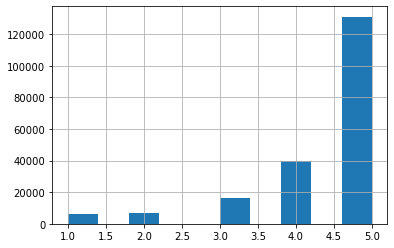

In [5]:
df['overall'].hist();pd.head()

In [4]:
df = pd.read_json('./preprocessedTrain.json', lines=True)

In [5]:
df['count_reviewer'] = df.groupby('reviewerID')['reviewerID'].transform('count')

In [ ]:
ax = df['count_reviewer'].plot.kde()
ax.set_xlim(0, 30)

In [6]:
ranges = [0, 1, 3, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500]

In [7]:
df['range'] = pd.cut(df.count_reviewer, ranges)

In [32]:
df['reviewer_group_count'] = df.groupby('range')['range'].transform('count')

In [38]:
countReviewer = df.groupby(['range'])['count_reviewer'].count()

In [39]:
countReviewerdf = pd.DataFrame(test)
countReviewerdf

,count_reviewer
range,
"(0, 1]",31783
"(1, 3]",64824
"(3, 5]",29950
"(5, 10]",27456
"(10, 20]",18488
"(20, 30]",7271
"(30, 40]",3825
"(40, 50]",2707
"(50, 60]",1788


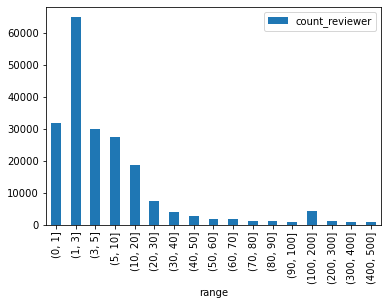

In [43]:
countReviewerdf.plot.bar(y='count_reviewer')

In [44]:
df['count_item'] = df.groupby('itemID')['itemID'].transform('count')

In [46]:
ranges = [0, 1, 3, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300]

In [47]:
df['range_item'] = pd.cut(df.count_item, ranges)

In [50]:
countItem = df.groupby(['range_item'])['count_item'].count()
countItemdf = pd.DataFrame(countItem)
countItemdf

,count_item
range_item,
"(0, 1]",2199
"(1, 3]",21022
"(3, 5]",25088
"(5, 10]",36541
"(10, 20]",36555
"(20, 30]",19587
"(30, 40]",12527
"(40, 50]",9454
"(50, 60]",7787


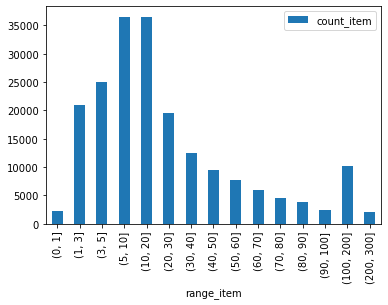

In [51]:
countItemdf.plot.bar(y='count_item')

In [7]:
df['token_count'] = df['review_tokens'].str.len()

In [26]:
df[df['review_tokens'].str.len() == 1]

,overall,reviewTime,reviewerID,reviewText,summary,unixReviewTime,category,price,itemID,reviewHash,review_tokens,review_lemma,review_pos,review_joined,token_count,count_reviewer
5,5,"09 7, 2015",u07624734,k,Five Stars,1441584000,Pop,$14.99,p78489708,23609516,[k],[k],[X],k,1,4
7,5,"03 3, 2016",u88679770,great,Five Stars,1456963200,Pop,$16.98,p92272123,76307426,[great],[great],[ADJ],great,1,10
12,3,"03 3, 2015",u80326609,good,Three Stars,1425340800,Pop,$8.99,p02683876,23898724,[good],[good],[ADJ],good,1,1
14,5,"08 12, 2016",u66989964,fave,Five Stars,1470960000,Pop,$11.57,p83852395,5580669,[fave],[fave],[VERB],fave,1,2
55,2,"05 9, 2015",u22557442,expected,Two Stars,1431129600,Classical,$11.83,p38301739,92395778,[expected],[expect],[VERB],expect,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199570,5,"02 28, 2015",u87515250,ok,Five Stars,1425081600,Pop,$7.29,p64932290,5963110,[ok],[ok],[INTJ],ok,1,15
199596,4,"12 4, 2014",u65640560,collection,Four Stars,1417651200,Jazz,$2.15,p76891834,67429536,[collection],[collection],[NOUN],collection,1,4
199597,5,"11 8, 2015",u85136324,love,Five Stars,1446940800,Pop,$11.88,p02978017,27368058,[love],[love],[NOUN],love,1,1
199599,5,"10 20, 2014",u37750462,great,Five Stars,1413763200,Alternative Rock,$18.98,p47415569,75099110,[great],[great],[ADJ],great,1,3


(0.0, 50.0)

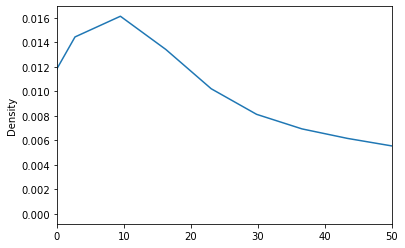

In [27]:
ax = df['token_count'].plot.kde()
ax.set_xlim(0, 50)

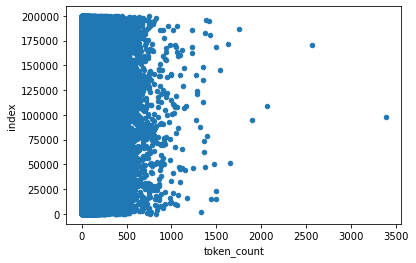

In [24]:
df.reset_index().plot.scatter(x='token_count', y='index')

In [34]:
df.token_count.quantile(.1)

3.0

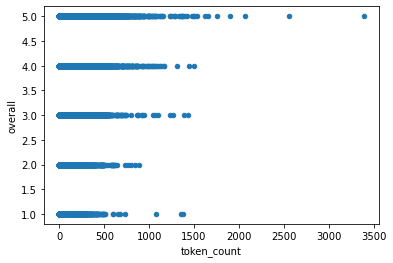

In [35]:
df.reset_index().plot.scatter(x='token_count', y='overall')

# Part 2 experiment

In [36]:
# used for part 2 only
# review['clean_reviewText'] = review[['clean_lemmatized']]

In [14]:
review1 = prep_nlp_data(review)

In [17]:
# only used for part 2
# review1['clean_summary'] = review1[['clean_lemmatized']]

In [19]:
review1.to_json(r'./preprocessedP2Train.json', orient='records', lines=True)

In [6]:
review1['clean_text'] = review1['clean_reviewText'] + review1['clean_summary']

In [9]:
# for part 2
nlp = spacy.load('en_core_web_sm')

text = []

USERFUL_POS = ['VERB', 'ADV', 'ADJ']

for doc in nlp.pipe(review1['clean_text'].astype('unicode').values):
    if doc.is_parsed:
        text.append([n.text for n in doc if n.pos_ in USERFUL_POS])
    else:
        # We want to make sure that the lists of parsed results have the
        # same number of entries of the original Dataframe, so add some blanks in case the parse fails
        text.append(None)
        pos.append(None)

review1['review_text'] = text

In [12]:
review1.to_json(r'./preprocessedPOSTrain.json', orient='records', lines=True)

In [3]:
review = pd.read_json('./preprocessedPOSTrain.json', lines=True)

In [10]:
review = review[review['review_text'].str.len() != 0]

In [13]:
review.to_json(r'./preprocessedPOSTrain.json', orient='records', lines=True)